In [1]:
# Instalar pacotes necessários
!pip install pandas matplotlib

In [2]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


In [3]:
# Montar Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


,X1,X2,label
0,0.376793,0.470511,0
1,0.262177,0.202234,0
2,0.223629,0.176655,0
3,0.300810,0.405716,0
4,0.275609,0.398839,0


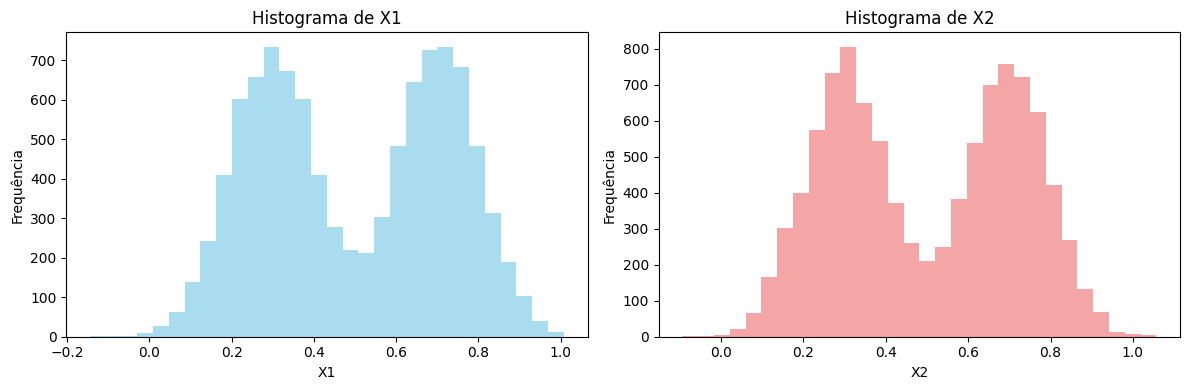

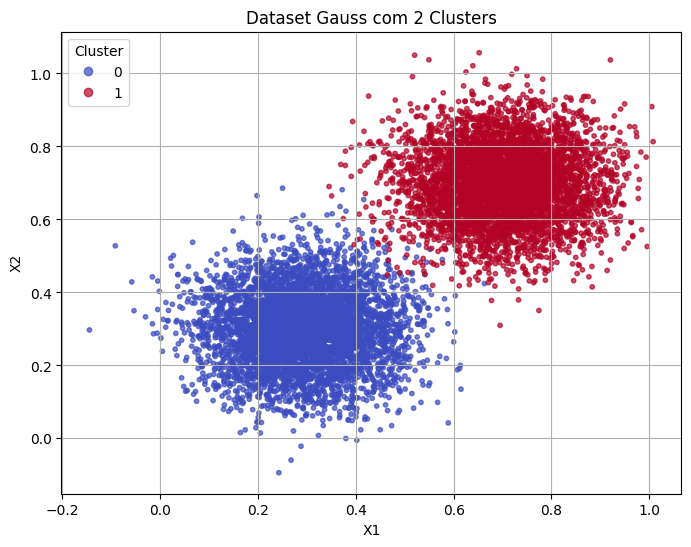

In [4]:
# Ler dataset do Google Drive (ajuste o caminho conforme necessário)
data = pd.read_csv('/content/drive/Othercomputers/Meu modelo Laptop/Aulas/UERJ/Redes Neurais/pratica 1 - RN/gauss_2clusters_simulado.csv')

# Mostrar as primeiras linhas do dataset
display(data.head())

# Plotar histogramas de X1 e X2
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histograma de X1
ax[0].hist(data['X1'], bins=30, color='skyblue', alpha=0.7)
ax[0].set_title('Histograma de X1')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Frequência')

# Histograma de X2
ax[1].hist(data['X2'], bins=30, color='lightcoral', alpha=0.7)
ax[1].set_title('Histograma de X2')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Plotar gráfico de dispersão com clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['X1'], data['X2'], c=data['label'], cmap='coolwarm', alpha=0.7, s=10)
plt.title('Dataset Gauss com 2 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()

In [4]:
# Instalação dos pacotes necessários
!pip install tensorflow pandas scikit-learn

#tensorflow: para criar e treinar redes neurais.
#pandas: para manipular os dados.
#scikit-learn: para dividir dados e gerar métricas.
#matplotlib: para criar gráficos.

In [5]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#pandas, numpy: manipulação de dados e arrays.
#train_test_split: divide os dados em treino e teste.
#classification_report: relatório com precisão, recall e f1-score.
#tensorflow.keras: construção da rede neural.
#drive: acesso ao Google Drive.
#matplotlib.pyplot: visualizações gráficas.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9085 - loss: 0.3897 - val_accuracy: 0.9965 - val_loss: 0.1035
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9967 - loss: 0.0869 - val_accuracy: 0.9965 - val_loss: 0.0532
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9976 - loss: 0.0500 - val_accuracy: 0.9965 - val_loss: 0.0368
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0350 - val_accuracy: 0.9960 - val_loss: 0.0283
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0270 - val_accuracy: 0.9960 - val_loss: 0.0235
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0223 - val_accuracy: 0.9965 - val_loss: 0.0201
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9973 - loss: 0.0200 - val_accuracy: 0.9960 - val_loss: 0.0183
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0173 - val_accuracy: 0.9970 - val_

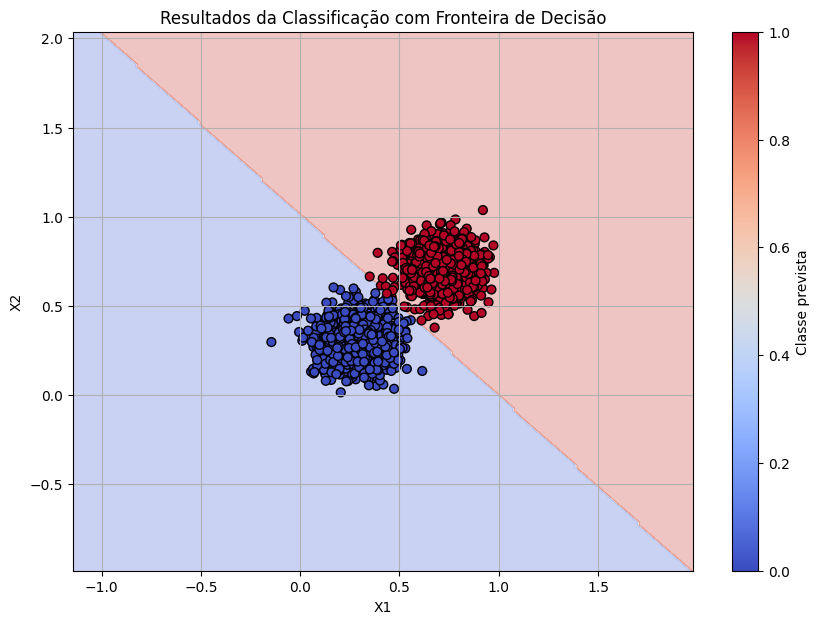

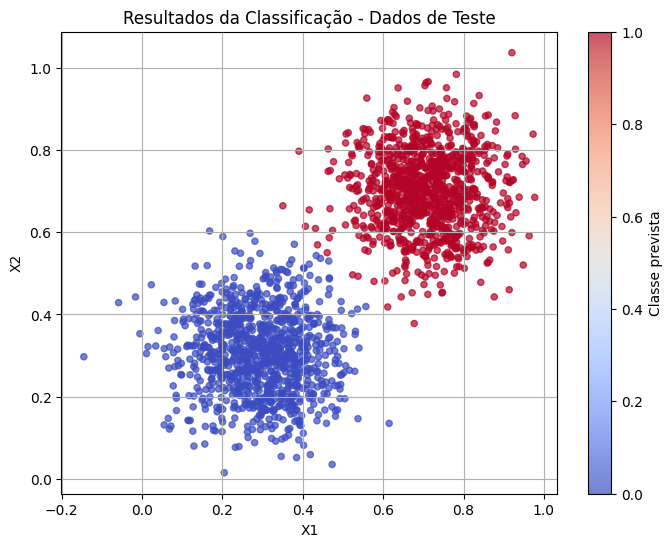

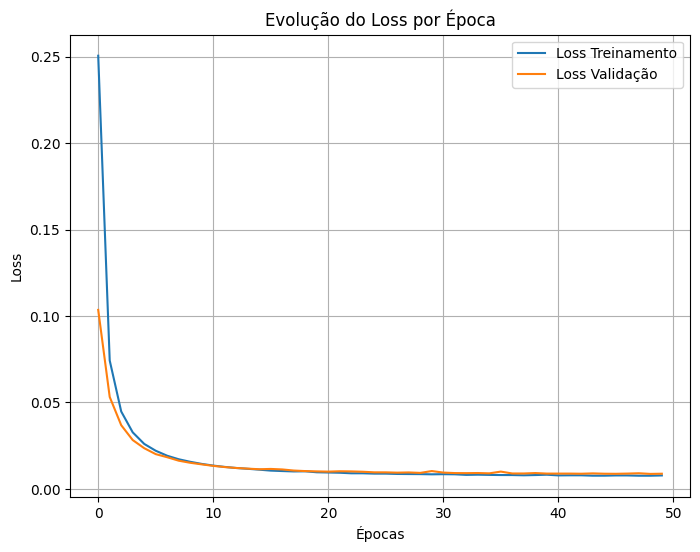

In [7]:
# Separar as features e o target
X = data[['X1', 'X2']]
y = data['label']
#X: contém as duas variáveis de entrada da rede (X1 e X2).
#y: contém a classe (0 ou 1) de cada ponto.

# Dividir em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% para treino (X_train, y_train)
#20% para teste (X_test, y_test)

random_state=42 #garante reprodutibilidade.


#Cria uma rede com 1 camada contendo 2 neurônios.
#input_shape=(2,) porque temos 2 entradas (X1 e X2).
#activation='linear': usa função de ativação linear (sem não-linearidade).

# Criar o modelo
model = Sequential([
    Dense(2, input_shape=(2,), activation='linear')
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#optimizer=Adam: método de otimização.
#learning_rate=0.03: taxa de aprendizado.
#loss=SparseCategoricalCrossentropy: função de perda para problemas de classificação com rótulos inteiros (0, 1).
#from_logits=True: porque a saída da rede ainda não está normalizada (sem softmax).
#metrics=['accuracy']: mede a acurácia do modelo.



# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
#Treina o modelo por 50 épocas.
#Também avalia o desempenho com os dados de teste em cada época.


# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
#Calcula e imprime a perda e acurácia final no conjunto de teste.



# Fazer previsões e gerar relatório de classificação
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))
#Faz previsões no conjunto de teste.
#Usa argmax porque o modelo retorna dois valores (um para cada classe).
#Exibe métricas de desempenho como precisão, recall, f1-score.


# Definir limites do gráfico
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1

# Criar um grid para plotar a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Fazer previsões no grid
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Plotar os pontos de teste e a fronteira
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test['X1'], X_test['X2'], c=y_pred, cmap='coolwarm', edgecolor='k', s=40)
plt.title('Resultados da Classificação com Fronteira de Decisão')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe prevista')
plt.show()

# Plotar os resultados graficamente - Mostra os pontos de teste com cores de acordo com a classe prevista pelo modelo.
plt.figure(figsize=(8, 6))
plt.scatter(X_test['X1'], X_test['X2'], c=y_pred, cmap='coolwarm', alpha=0.7, s=20)
plt.title('Resultados da Classificação - Dados de Teste')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe prevista')
plt.show()

# Plotar gráficos de loss de treino e validação - Mostra como a perda do modelo se comportou ao longo das épocas, tanto no treino quanto na validação.
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Evolução do Loss por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Para introduzir mais uma camada oculta com 4 neurônios na rede neural, precisamos ajustar a parte do código responsável pela definição do modelo. Vou assumir que você deseja manter a camada de saída com 2 neurônios (como antes), mas adicionar uma camada intermediária com 4 neurônios e ativação linear.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9270 - loss: 0.1952 - val_accuracy: 0.9960 - val_loss: 0.0112
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9969 - loss: 0.0113 - val_accuracy: 0.9965 - val_loss: 0.0091
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0103 - val_accuracy: 0.9965 - val_loss: 0.0086
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9950 - val_loss: 0.0111
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9965 - loss: 0.0089 - val_accuracy: 0.9960 - val_loss: 0.0090
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9960 - val_loss: 0.0108
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 0.9935 - val_loss: 0.0146
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9968 - loss: 0.0082 - val_accuracy: 0.9960 - val_

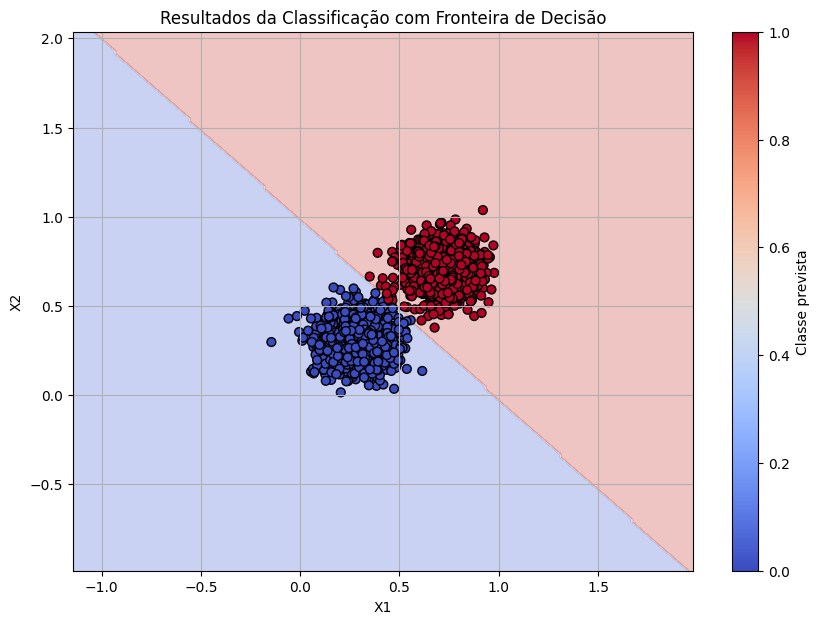

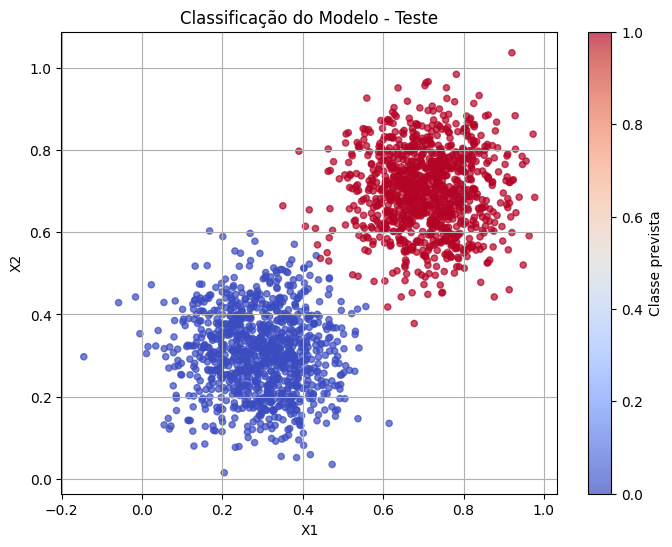

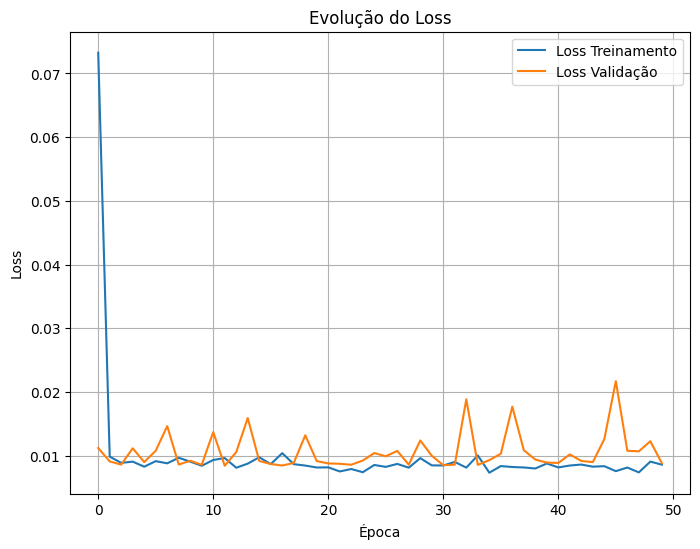

In [8]:

# Criar modelo com camada oculta de 4 neurônios e ativação linear
model = Sequential([
    Dense(4, input_shape=(2,), activation='linear'),  # Camada oculta com 4 neurônios
    Dense(2, activation='linear')  # Camada de saída com 2 neurônios (para classificação de 2 classes)
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Avaliar no conjunto de teste
loss, acc = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f} | Accuracy: {acc:.4f}")

# Prever e mostrar relatório
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred))




# Definir limites do gráfico
x_min, x_max = X_test['X1'].min() - 1, X_test['X1'].max() + 1
y_min, y_max = X_test['X2'].min() - 1, X_test['X2'].max() + 1

# Criar um grid para plotar a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Fazer previsões no grid
Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Plotar os pontos de teste e a fronteira
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test['X1'], X_test['X2'], c=y_pred, cmap='coolwarm', edgecolor='k', s=40)
plt.title('Resultados da Classificação com Fronteira de Decisão')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.colorbar(label='Classe prevista')
plt.show()

# Visualização gráfica das previsões
plt.figure(figsize=(8, 6))
plt.scatter(X_test['X1'], X_test['X2'], c=y_pred, cmap='coolwarm', alpha=0.7, s=20)
plt.title('Classificação do Modelo - Teste')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Classe prevista')
plt.grid(True)
plt.show()

# Gráfico de loss por época
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Evolução do Loss')
plt.legend()
plt.grid(True)
plt.show()

O loss médio não cresce consistentemente;

O modelo generaliza bem.

Mas se quiser testar melhorias, pode:

Diminuir a taxa de aprendizado: tente 0.01 ou 0.001;

Adicionar mais neurônios ou camadas;

Testar funções de ativação não lineares (como relu, tanh);